In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import random
import seaborn as sns
from mpl_toolkits import mplot3d

In [11]:
# sample_host = pd.read_csv("/Users/rx32940/Desktop/pbio8350TermProject/host_only_interrogans_summarized.csv"
#                           , header=None,index_col=0)
path = "/Users/rx32940/Desktop/pbio8350TermProject/"

sample_host=pd.read_csv("/Users/rx32940/Desktop/pbio8350TermProject/host_only_interrogan.csv"
                          , header=None,index_col=0)

all_genes = pd.read_csv("/Users/rx32940/Desktop/pbio8350TermProject/roary_host/gene_presence_absence.Rtab"
                        ,header = 0, index_col="Gene",sep="\t",low_memory=False)

all_genes_t= all_genes.transpose()
# all_genes_t.index=[list(range(1,166))]
all_genes_t

sample_host


host_gene_profile = pd.merge(sample_host,all_genes_t,left_index=True,right_index=True)
host_gene_profile= host_gene_profile.rename(columns= {1:"labels"})
host_gene_profile.index=host_gene_profile[2]
host_gene_profile
# host_gene_profile.index=[host_gene_profile[2]]
host_gene_profile_factors = host_gene_profile.iloc[:,2:]



In [5]:
pca = PCA(n_components=4)
pc_12 = pca.fit_transform(host_gene_profile_factors)
# print(pca.explained_variance_ratio_)
pc_12_df = pd.DataFrame(data=pc_12,columns=["PC1","PC2","PC3","PC4"])
pc_12_df.index=list(range(1,166))
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
# print(pca.components_)

Explained variation per principal component: [0.13356587 0.0623372  0.05239008 0.0351223 ]


<Figure size 432x288 with 0 Axes>

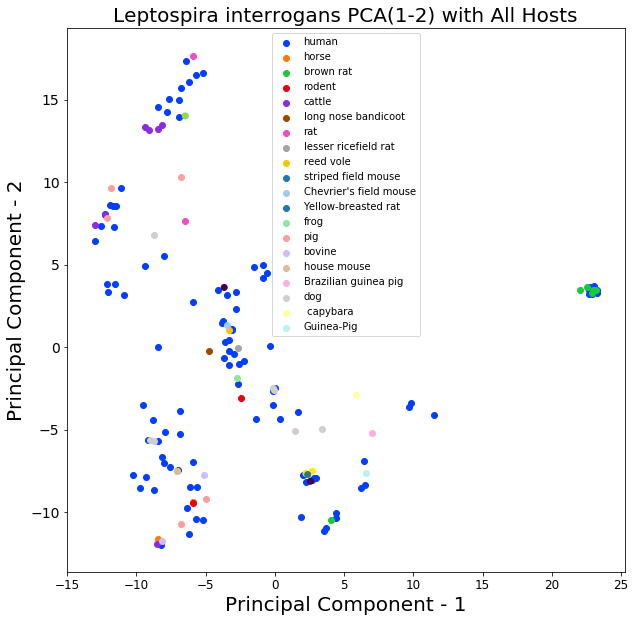

In [20]:
plt.figure()
plt.figure(figsize=(10,10))
targets=[list(pd.unique(host_gene_profile["labels"]))][0]
zoo_targets=targets
# zoo_targets=targets[1:]
# zoo_targets=["cattle","brown rat","bovine"]
zoo_targets
colors =sns.color_palette("bright")+sns.color_palette("pastel")
colors
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Leptospira interrogans PCA(1-2) with All Hosts",fontsize=20)


for target,col in zip(zoo_targets,colors):
    indicesToKeep=host_gene_profile["labels"] == target
#     print(indicesToKeep)
    plt.scatter(pc_12_df.loc[indicesToKeep,"PC1"],pc_12_df.loc[indicesToKeep,"PC2"],
                   c=col)
plt.legend(zoo_targets)

plt.savefig(path + "PCA/PC12_host_with_human.png")

<Figure size 432x288 with 0 Axes>

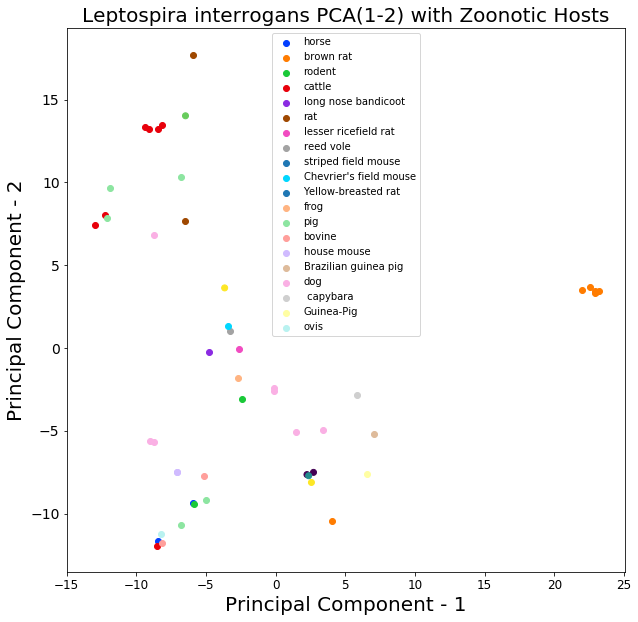

In [21]:
plt.figure()
plt.figure(figsize=(10,10))
targets=[list(pd.unique(host_gene_profile["labels"]))][0]
zoo_targets=targets[1:]
# zoo_targets=["cattle","brown rat","bovine"]
zoo_targets
colors =sns.color_palette("bright")+sns.color_palette("pastel")
colors
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Leptospira interrogans PCA(1-2) with Zoonotic Hosts",fontsize=20)


for target,col in zip(zoo_targets,colors):
    indicesToKeep=host_gene_profile["labels"] == target
#     print(indicesToKeep)
    plt.scatter(pc_12_df.loc[indicesToKeep,"PC1"],pc_12_df.loc[indicesToKeep,"PC2"],
                   c=col)
plt.legend(zoo_targets)

plt.savefig(path + "PCA/PC12_host.png")

<Figure size 432x288 with 0 Axes>

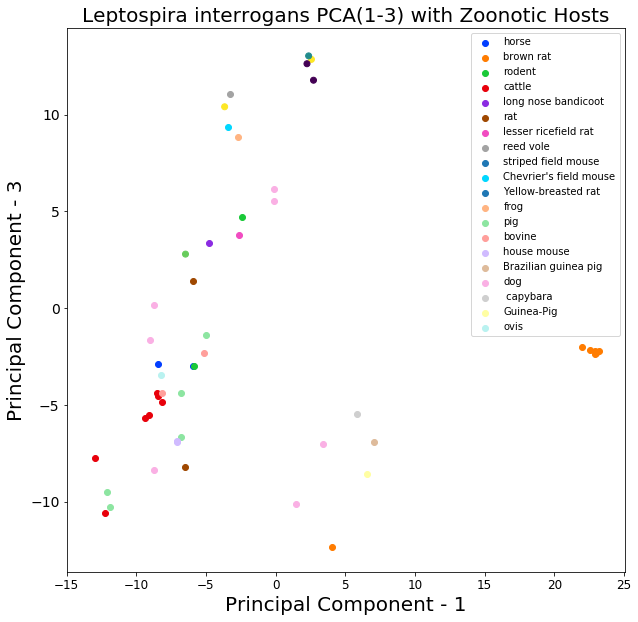

In [22]:
plt.figure()
plt.figure(figsize=(10,10))
targets=[list(pd.unique(host_gene_profile["labels"]))][0]
zoo_targets=targets[1:]
# zoo_targets=["cattle","brown rat","bovine"]
zoo_targets
colors =sns.color_palette("bright")+sns.color_palette("pastel")
colors
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 3',fontsize=20)
plt.title("Leptospira interrogans PCA(1-3) with Zoonotic Hosts",fontsize=20)


for target,col in zip(zoo_targets,colors):
    indicesToKeep=host_gene_profile["labels"] == target
#     print(indicesToKeep)
    plt.scatter(pc_12_df.loc[indicesToKeep,"PC1"],pc_12_df.loc[indicesToKeep,"PC3"],
                   c=col)
plt.legend(zoo_targets)

plt.savefig(path + "PCA/PC13_host.png")

Text(0.5,0.92,'PCA for the Presence/Absence of Genes in Leptospira Genome')

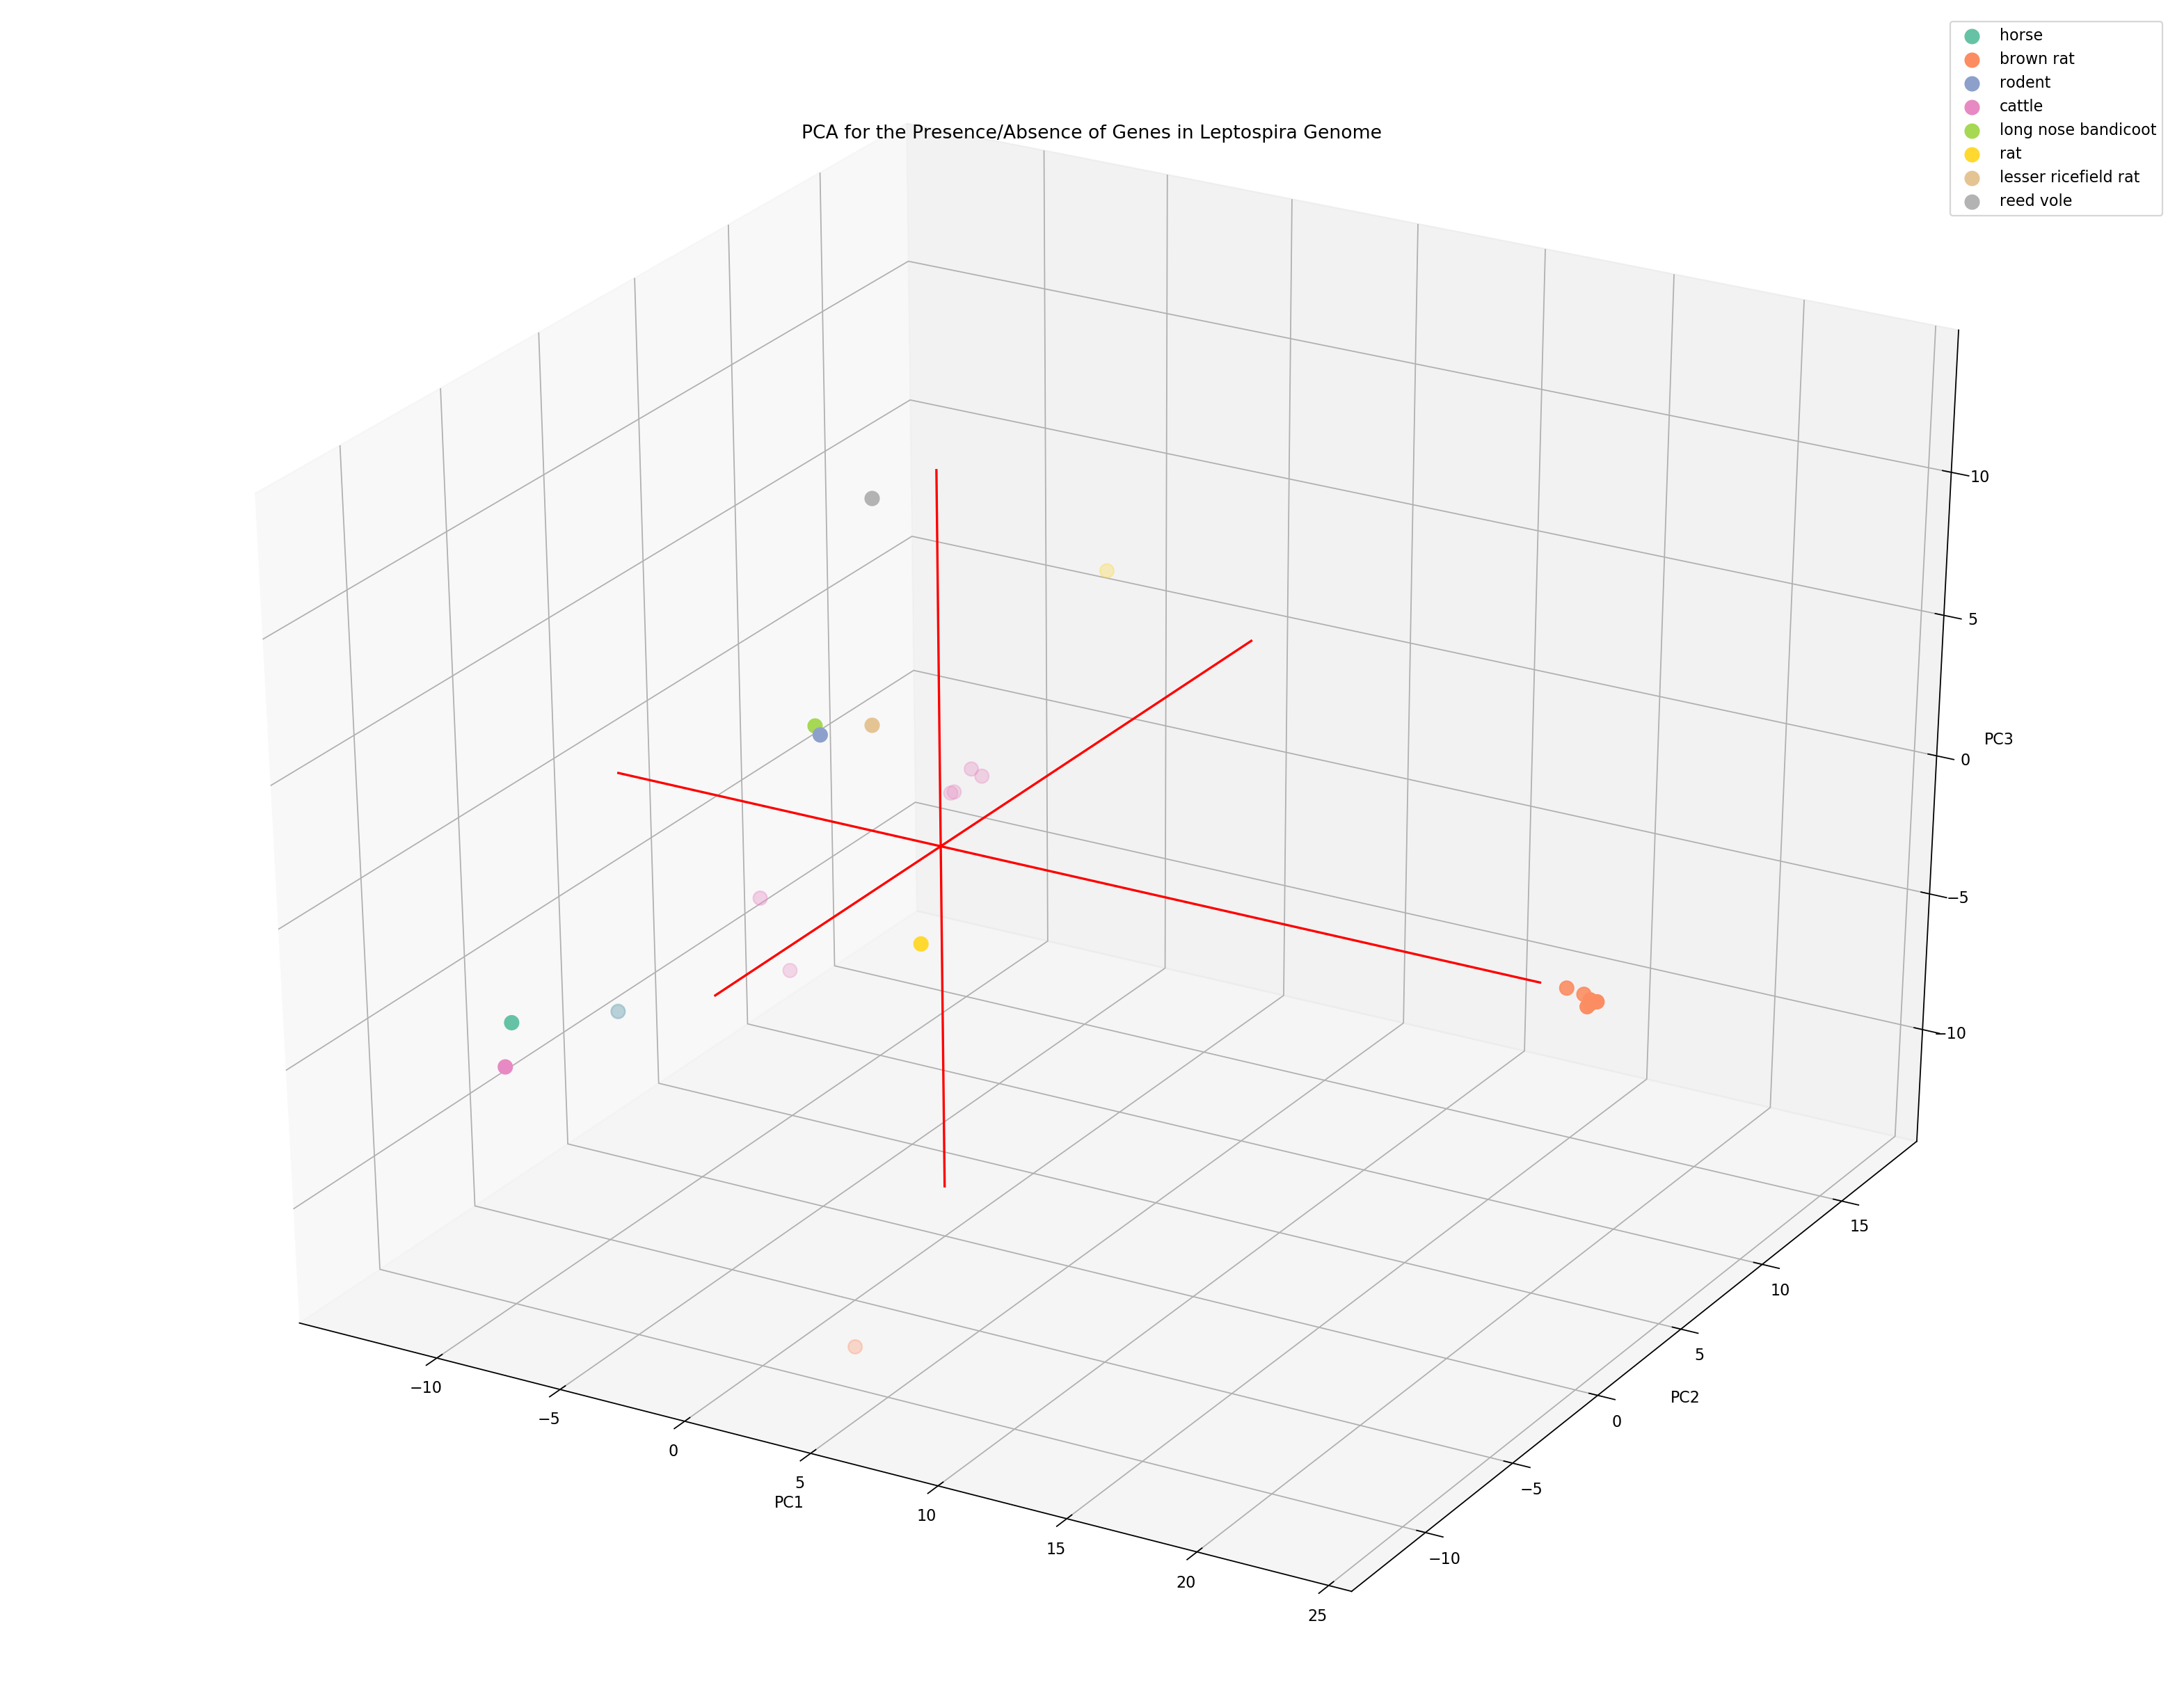

In [9]:
fig = plt.figure(figsize=(25,20),dpi=160)
ax = fig.add_subplot(111, projection='3d')
# plt.figure()
# plt.figure(figsize=(10,10))
targets=[list(pd.unique(host_gene_profile["labels"]))][0]

zoo_targets
colors =sns.color_palette("Set2")
colors
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=14)
# plt.xlabel('Principal Component - 2',fontsize=20)
# plt.ylabel('Principal Component - 3',fontsize=20)
# plt.title("Principal Component Analysis (2-3) of Leptospira interrogans Host",fontsize=20)


for target,col in zip(zoo_targets,colors):
    indicesToKeep=host_gene_profile["labels"] == target
#     print(indicesToKeep)
#     plt.scatter(pc_12_df.loc[indicesToKeep,"PC2"],pc_12_df.loc[indicesToKeep,"PC3"],c=col)
    ax.scatter(pc_12_df.loc[indicesToKeep,"PC1"], pc_12_df.loc[indicesToKeep,"PC2"], pc_12_df.loc[indicesToKeep,"PC3"], c=col, s=80)
ax.legend(zoo_targets)

xAxisLine = ((min(pc_12_df['PC1']), max(pc_12_df['PC1'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(pc_12_df['PC2']), max(pc_12_df['PC2'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(pc_12_df['PC3']), max(pc_12_df['PC3'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA for the Presence/Absence of Genes in Leptospira Genome")


NameError: name 'ax' is not defined